<a href="https://colab.research.google.com/github/maeliech/Bachelor2020_2022/blob/main/StockPricesBGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analyzing Stock Prices

In [51]:
import yfinance as yf
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

1. Get a daily stock price or the return in yahoo/finance. (See Ref. 2)

Other tickers are: AMZN, HYMC, JNJ

In [52]:
start_date = '2019-01-01'
end_date = '2023-01-01' 

ticker = 'CAT'

datad = yf.download(ticker, start_date, end_date)
prices_o = datad['Open']
prices_o.tail()

[*********************100%***********************]  1 of 1 completed


Date
2022-12-23    236.949997
2022-12-27    240.690002
2022-12-28    243.139999
2022-12-29    241.210007
2022-12-30    239.389999
Name: Open, dtype: float64

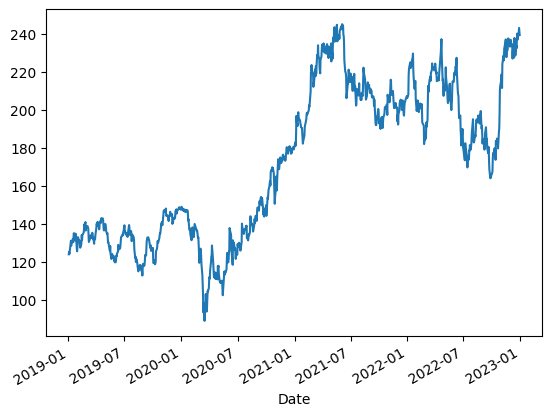

In [53]:
%matplotlib inline

prices_o.plot()
plt.show()

2. Calculate and plot the autocorrelation for a stock.

We start by computing the autocorrelations, we then plot the autocorrelation

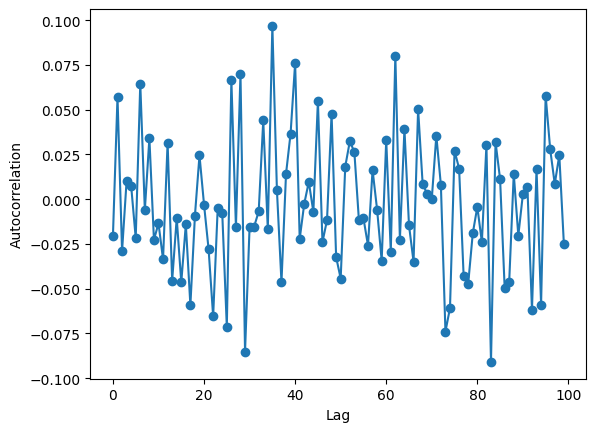

In [54]:
auto_array = prices_o.copy()
prices_o = prices_o.pct_change()

autoc = [prices_o.autocorr(lag=i) for i in range(1, 101)] 

plt.plot(autoc, marker='o')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

3. Get several stock prices. (See Refs)

In [55]:
stocks = ['CAT','AMZN','JNJ']
array = pd.DataFrame(columns=stocks)
for i in stocks:
  array[i] = yf.download(i, start_date, end_date)['Open']

array.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,CAT,AMZN,JNJ
Date,,,
2019-01-02,124.029999,73.260002,128.130005
2019-01-03,125.309998,76.000504,128.139999
2019-01-04,124.169998,76.500000,127.120003
2019-01-07,128.589996,80.115501,127.629997
2019-01-08,129.899994,83.234497,128.179993


4. Calculate and plot Pearson correlation coefficients of the price or the return between two stocks

In [56]:
stock1 = yf.download('CAT', '2020-01-01', '2022-01-01')
stock2 = yf.download('GLD', '2020-01-01', '2022-01-01')
stock1_o = stock1['Open']
stock2_o = stock2['Open']
print(np.corrcoef(stock1_o,stock2_o))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[[1.         0.26156678]
 [0.26156678 1.        ]]


Between the CAT and the GLD stocks, we have the above correlation coefficient for their open prices.

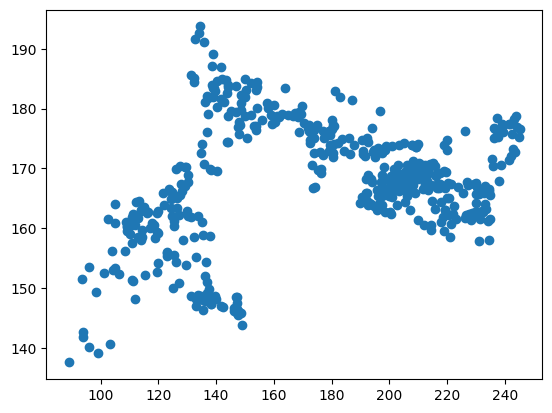

In [58]:
plt.scatter(stock1_o,stock2_o)

Plot of the two open prices stocks.